# Zero de Funções
Noções de zero de funções usando [Julia](http://julialang.org/)

- *Disciplinas*: **EAMB018-A**, **EPET019-A**
- *Professores*: [Adeildo S. Ramos Jr](mailto:adramos@ctec.ufal.br), [Luciana C. L. M. Vieira](mailto:luciana.vieira@ctec.ufal.br)
- *Tutores*: [Leonardo T. Ferreira](mailto:leonardo.ferreira@ctec.ufal.br), [Paulo Victor L. Santos](mailto:paulo.santos@ctec.ufal.br), [Ricardo A. Fernandes](mailto:ricardo.fernandes@ctec.ufal.br)


- Referências:
    - Chapra, S. C. (2012) Applied Numerical Methods with MATLAB for Engineers and Scientists, 3th Edition. McGraw-Hill.
    - Bezanson, J.; Edelman, A.; Karpinski, S.; Shah V. B. (2017) Julia: A Fresh Approach to Numerical Computing. SIAM Review, 59: 65-98.

## Métricas de Erros

In [1]:
# Erro baseado no valor absoluto da função f
function err_f(f, x_history)
    return abs(f(x_history[end]))
end;

In [2]:
# Erro baseado no incremento do valor de x
function err_dx(f, x_history)
    if length(x_history) > 1
        return abs(x_history[end] - x_history[end-1])
    else
        return err_f(f, x_history)
    end
end

err_dx (generic function with 1 method)

In [3]:
# Erro baseado no incremento relativo do valor de x
function err_rel(f, x_history)
    if length(x_history) > 1
        if abs(x_history[end]) < 1e-15
            return err_dx(f, x_history)
        else
            return abs(1 - x_history[end-1] / x_history[end])
        end
    else
        return err_f(f, x_history)
    end
end;

## Visualização de Pontos de Avaliação

In [4]:
# Usando pacote Plots
using Plots

# Função para visualização de pontos de avaliação
function view(f, x_history; title="", rgb=[1., 0, 0])
    
    # Inicialização e limites do gráfico
    gr(xlabel="x", ylabel="f(x)", title=title, legend=false)
    xmin, xmax = minimum(x_history), maximum(x_history); Δ = 0.1 * (xmax - xmin)
    
    # Plot da função f(x)
    p = plot(f, xmin - Δ, xmax + Δ, color=:black)
    
    # Definição de cores e plot dos pontos de avaliação
    t(r, λ) = 1 - (1 - r) * λ/length(x_history)
    color = [RGB(t(rgb[1],λ), t(rgb[2],λ), t(rgb[3],λ)) for λ = 0 : length(x_history)]
    scatter!(p, x_history, [f(x) for x in x_history], color=color)
    
    # Retorna objeto do plot
    return p
end;

## Método da Bisseção

In [5]:
function cn_bisection(f, a, b; err=x->err_f(f,x), tol=1e-2, nitemax=100)
    
    # Inicializa número de iterações e valor da variável x
    nite = 0
    x = (a + b) / 2.
        
    # Checa condição de existência de raiz
    if f(a) * f(b) > 0
        println("O método da bisseção não pode ser utilizado")
        return x, nite
    end
    
    # Inicializa vetor com histórico dos valores de x
    x_history = zeros(nitemax + 1)
    x_history[1] = x

    # Iterações
    while err(x_history[1:nite+1]) > tol && nite < nitemax
        
        # Atualiza os limites a, b
        if f(a) * f(x) > 0
            a = x
        else
            b = x
        end

        # Atualiza variável e número de iterações
        x = (a + b) / 2.
        nite = nite + 1
        
        # Atualiza histórico da variável x
        x_history[nite + 1] = x
    end
    
    # Retorna valor da variável e número de iterações
    return x_history[1 : nite + 1], nite
    
end;

## Método das Cordas

In [6]:
function cn_cordas(f, a, b; err=x->err_f(f,x), tol=1e-2, nitemax=100)
    
    # Inicializa número de iterações e valor da variável x
    nite = 0
    x = (b * f(a) - a * f(b)) / (f(a) - f(b))
        
    # Checa condição de existência de raiz
    if f(a) * f(b) > 0
        println("O método das cordas não pode ser utilizado")
        return x, nite
    end
    
    # Inicializa vetor com histórico dos valores de x
    x_history = zeros(nitemax + 1)
    x_history[1] = x

    # Iterações
    while err(x_history[1:nite+1]) > tol && nite < nitemax
        
        # Atualiza os limites a, b
        if f(a) * f(x) > 0
            a = x
        else
            b = x
        end

        # Atualiza variável e número de iterações
        x = (b * f(a) - a * f(b)) / (f(a) - f(b))
        nite = nite + 1
        
        # Atualiza histórico da variável x
        x_history[nite + 1] = x
    end
    
    # Retorna valor da variável e número de iterações
    return x_history[1 : nite + 1], nite
    
end;

## Método de Newton- Raphson

In [7]:
function cn_newton(f, df, x; err=x->err_f(f,x), tol=1e-2, nitemax=100)
    
    # Inicializa número de iterações
    nite = 0
    
    # Inicializa vetor com histórico dos valores de x
    x_history = zeros(nitemax + 1)
    x_history[1] = x

    # Iterações
    while err(x_history[1:nite+1]) > tol && nite < nitemax
        
        # Atualiza variável e número de iterações
        x = x - f(x) / df(x)
        nite = nite + 1
        
        # Atualiza histórico da variável x
        x_history[nite + 1] = x
    end
    
    # Retorna valor da variável e número de iterações
    return x_history[1 : nite + 1], nite
    
end;

## Exemplo 1

In [8]:
# Função f(x)
f(x) = (x/2)^2 - sin(x)

# Limites a ≤ x ≤ b
# a, b = 1.5, 2.0;
a, b = 0.5, 2.5;

### Avaliação usando Método da Bisseção

In [9]:
# Avaliação do Exemplo 1 usando método da bisseção com métrica de erro baseada em f
x_f, nite_f = cn_bisection(f, a, b, err=x->err_f(f,x), tol=0.01)

([1.5, 2.0, 1.75, 1.875, 1.9375], 4)

In [10]:
# Avaliação do Exemplo 1 usando método da bisseção com métrica de erro baseada em dx
x_dx, nite_dx = cn_bisection(f, a, b, err=x->err_dx(f,x), tol=0.01)

([1.5, 2.0, 1.75, 1.875, 1.9375, 1.90625, 1.921875, 1.9296875], 7)

In [11]:
# Avaliação do Exemplo 1 usando método da bisseção com métrica de erro baseada em dx/x
x_rel, nite_rel = cn_bisection(f, a, b, err=x->err_rel(f,x), tol=0.01)

([1.5, 2.0, 1.75, 1.875, 1.9375, 1.90625, 1.921875], 6)

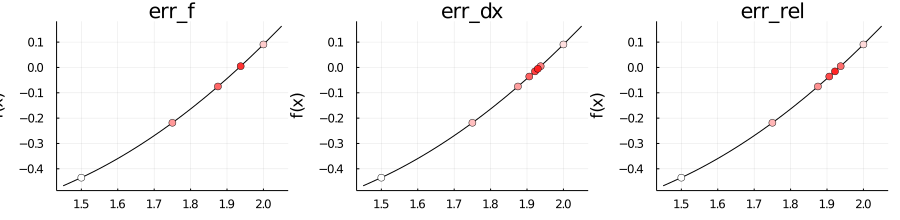

In [12]:
# Gráficos
plot(view(f, x_f, title="err_f"), view(f, x_dx, title="err_dx"), view(f, x_rel, title="err_rel"), layout=(1,3), size=(900, 220))

### Avaliação usando Método das Cordas

In [13]:
# Avaliação do Exemplo 1 usando método das cordas com métrica de erro baseada em f
x_f, nite_f = cn_cordas(f, a, b, err=x->err_f(f,x), tol=0.01)

([1.1038227506657954, 1.6329609248912529, 1.8547832762184502, 1.9153623225619618, 1.9296034444918957], 4)

In [14]:
# Avaliação do Exemplo 1 usando método das cordas com métrica de erro baseada em dx
x_dx, nite_dx = cn_cordas(f, a, b, err=x->err_dx(f,x), tol=0.01)

([1.1038227506657954, 1.6329609248912529, 1.8547832762184502, 1.9153623225619618, 1.9296034444918957, 1.9328240261619745], 5)

In [15]:
# Avaliação do Exemplo 1 usando método das cordas com métrica de erro baseada em dx/x
x_rel, nite_rel = cn_cordas(f, a, b, err=x->err_rel(f,x), tol=0.01)

([1.1038227506657954, 1.6329609248912529, 1.8547832762184502, 1.9153623225619618, 1.9296034444918957], 4)

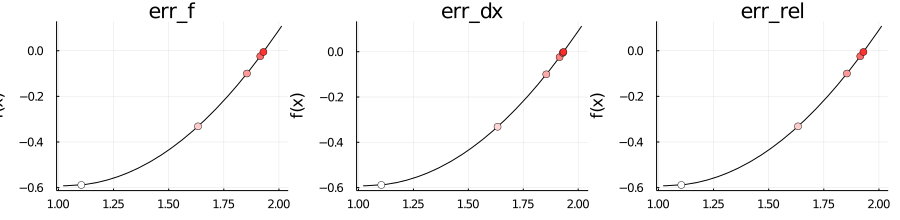

In [16]:
# Gráficos
plot(view(f, x_f, title="err_f"), view(f, x_dx, title="err_dx"), view(f, x_rel, title="err_rel"), layout=(1, 3), size=(900, 220))

### Avaliação usando Método de Newton-Raphson

In [17]:
# Derivada de f(x)
using ForwardDiff
df(x) = ForwardDiff.derivative(f, x)

# Estimativa inicial
x0 = 1.5;

In [18]:
# Avaliação do Exemplo 1 usando método de Newton-Raphson com métrica de erro baseada em f
x_f, nite_f = cn_newton(f, df, x0; err=x->err_f(f,x), tol=0.01)

([1.5, 2.1403927723880054, 1.952008946405626, 1.933930573929843], 3)

In [19]:
# Avaliação do Exemplo 1 usando método de Newton-Raphson com métrica de erro baseada em dx
x_dx, nite_dx = cn_newton(f, df, x0; err=x->err_dx(f,x), tol=0.01)

([1.5, 2.1403927723880054, 1.952008946405626, 1.933930573929843, 1.933753779789742], 4)

In [20]:
# Avaliação do Exemplo 1 usando método de Newton-Raphson com métrica de erro baseada em dx/x
x_rel, nite_rel = cn_newton(f, df, x0; err=x->err_rel(f,x), tol=0.01)

([1.5, 2.1403927723880054, 1.952008946405626, 1.933930573929843], 3)

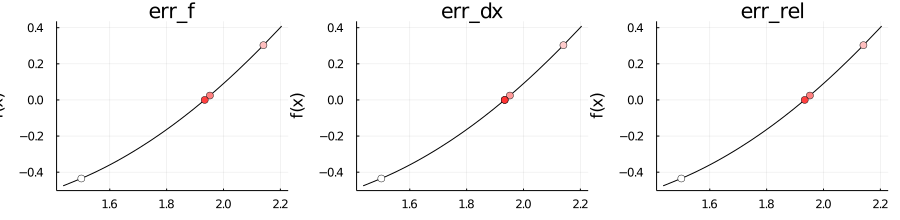

In [21]:
# Gráficos
plot(view(f, x_f, title="err_f"), view(f, x_dx, title="err_dx"), view(f, x_rel, title="err_rel"), layout=(1, 3), size=(900, 220))

## Exemplo 2

In [22]:
# Função f(x)
f(x) = x^3 - cos(x)

# Derivada de f(x)
using ForwardDiff
df(x) = ForwardDiff.derivative(f, x)

# Limites a ≤ x ≤ b
# a, b = 0.5, 1.2;
a, b = 0.1, 1.5

# Estimativa inicial
x0 = a;

In [23]:
# Avaliação do Exemplo 2 usando método da bisseção com métrica de erro baseada em dx/x
x_b, nite_b = cn_bisection(f, a, b, err=x->err_rel(f,x), tol=0.01)

([0.8, 1.15, 0.975, 0.8875, 0.84375, 0.865625, 0.8546875, 0.86015625], 7)

In [24]:
# Avaliação do Exemplo 2 usando método das cordas com métrica de erro baseada em dx/x
x_c, nite_c = cn_cordas(f, a, b, err=x->err_rel(f,x), tol=0.01)

([0.42375974856162935, 0.6409603863731307, 0.7612822102435234, 0.819512501810503, 0.8456892569614192, 0.8570502734255139, 0.8619044513574435], 6)

In [25]:
# Avaliação do Exemplo 2 usando método de newton-raphson com métrica de erro baseada em dx/x
x_n, nite_n = cn_newton(f, df, x0, err=x->err_rel(f,x), tol=0.01)

([0.1, 7.7559963601813555, 5.185382279367444, 3.4433440019180095, 2.2588223179591385, 1.5025626292750063, 1.07478618067643, 0.8985748622429244, 0.8664922686001475, 0.8654750382113325], 9)

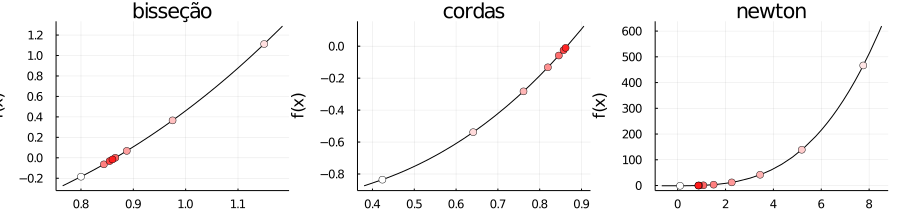

In [26]:
# Gráficos
plot(view(f, x_b, title="bisseção"), view(f, x_c, title="cordas"), view(f, x_n, title="newton"), layout=(1, 3), size=(900, 220))

## Exemplo 3

In [27]:
# Função f(x)
f(x) = x/2 - tan(x)

# Derivada de f(x)
using ForwardDiff
df(x) = ForwardDiff.derivative(f, x)

# Limites a ≤ x ≤ b
# a, b = -0.2, 0.8
a, b = -1.0, 1.2

# Estimativa inicial
x0 = a;

In [28]:
# Avaliação do Exemplo 2 usando método da bisseção com métrica de erro baseada em dx/x
x_b, nite_b = cn_bisection(f, a, b, err=x->err_rel(f,x), tol=0.01)

([0.09999999999999998, -0.45, -0.17500000000000002, -0.03750000000000002, 0.03124999999999998, -0.00312500000000002, 0.01406249999999998, 0.00546874999999998, 0.0011718749999999798, -0.0009765625000000202  …  9.092928430411782e-14, -4.092928016709927e-13, -1.5918175868343744e-13, -3.412623718965981e-14, 2.8401523557229004e-14, -2.8623568162154035e-15, 1.27695833705068e-14, 4.953613277145698e-15, 1.0456282304651474e-15, -9.08364292875128e-16], 49)

In [29]:
# Avaliação do Exemplo 2 usando método das cordas com métrica de erro baseada em dx/x
x_c, nite_c = cn_cordas(f, a, b, err=x->err_rel(f,x), tol=0.01)

([-0.2321335455229232, -0.1497785848403849, -0.09968050430851032, -0.06743679594290482, -0.046067737667808153, -0.03166209290675002, -0.021847403471681615, -0.015114769076933914, -0.010475459487734758, -0.007268905387081623  …  -2.2832048521020195e-14, -1.5885711860635952e-14, -1.1052702567919837e-14, -7.69006986445563e-15, -5.3504719010400855e-15, -3.722664431976006e-15, -2.590094991510062e-15, -1.802094222466504e-15, -1.2538318468211043e-15, -8.723707564808214e-16], 91)

In [30]:
# Avaliação do Exemplo 2 usando método de newton-raphson com métrica de erro baseada em dx/x
x_n, nite_n = cn_newton(f, df, x0, err=x->err_rel(f,x), tol=0.01)

([-1.0, -0.6385571963743466, -0.23606517327294052, -0.01644614855266649, -5.929122591920993e-6, -2.779140510929777e-16], 5)

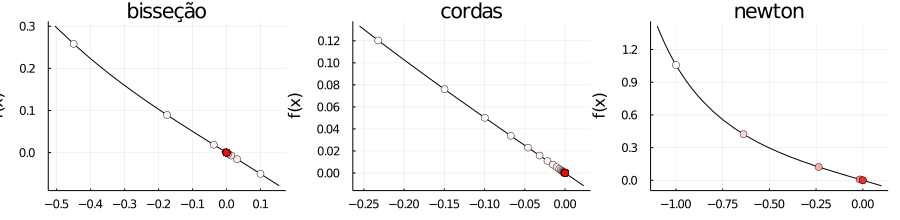

In [31]:
# Gráficos
plot(view(f, x_b, title="bisseção"), view(f, x_c, title="cordas"), view(f, x_n, title="newton"), layout=(1, 3), size=(900, 220))

## Exemplo 4

In [32]:
# Função f(x)
f(x) = 2cos(x) - exp(x)/2

# Derivada de f(x)
using ForwardDiff
df(x) = ForwardDiff.derivative(f, x)

# Limites a ≤ x ≤ b
# a, b = -0.5, 1.0
a, b = -0.5, 1.5

# Estimativa inicial
x0 = a;

In [33]:
# Avaliação do Exemplo 2 usando método da bisseção com métrica de erro baseada em dx/x
x_b, nite_b = cn_bisection(f, a, b, err=x->err_rel(f,x), tol=0.01)

([0.5, 1.0, 0.75, 0.875, 0.9375, 0.90625, 0.890625, 0.8984375], 7)

In [34]:
# Avaliação do Exemplo 2 usando método das cordas com métrica de erro baseada em dx/x
x_c, nite_c = cn_cordas(f, a, b, err=x->err_rel(f,x), tol=0.01)

([0.31767921012903894, 0.7506391909237369, 0.8714044440490748, 0.8978969433581343, 0.9033801086710987], 4)

In [35]:
# Avaliação do Exemplo 2 usando método de newton-raphson com métrica de erro baseada em dx/x
x_n, nite_n = cn_newton(f, df, x0, err=x->err_rel(f,x), tol=0.01)

([-0.5, -2.714660400700674, -0.38323303683296395, -4.103230363202121, -4.802412358288128, -4.714387228887928, -4.714629778087784], 6)

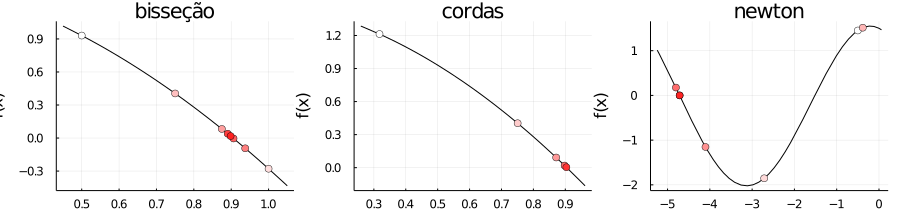

In [36]:
# Gráficos
plot(view(f, x_b, title="bisseção"), view(f, x_c, title="cordas"), view(f, x_n, title="newton"), layout=(1, 3), size=(900, 220))

## Exemplo 5

In [37]:
# Função f(x)
f(x) = x^10 - 1

# Derivada de f(x)
using ForwardDiff
df(x) = ForwardDiff.derivative(f, x)

# Limites a ≤ x ≤ b
a, b = 0.5, 2.0

# Estimativa inicial
x0 = a;

In [38]:
# Avaliação do Exemplo 2 usando método da bisseção com métrica de erro baseada em dx/x
x_b, nite_b = cn_bisection(f, a, b, err=x->err_rel(f,x), tol=0.01)

([1.25, 0.875, 1.0625, 0.96875, 1.015625, 0.9921875, 1.00390625, 0.998046875], 7)

In [39]:
# Avaliação do Exemplo 2 usando método das cordas com métrica de erro baseada em dx/x
x_c, nite_c = cn_cordas(f, a, b, err=x->err_rel(f,x), tol=0.01)

([0.5014634146341463, 0.5029253592050006], 1)

In [40]:
# Avaliação do Exemplo 2 usando método de newton-raphson com métrica de erro baseada em dx/x
x_n, nite_n = cn_newton(f, df, x0, err=x->err_rel(f,x), tol=0.01)

([0.5, 51.65, 46.485, 41.8365, 37.65285, 33.887565, 30.498808500000003, 27.44892765000001, 24.70403488500002, 22.233631396500048  …  1.9706857398116153, 1.7738402370975677, 1.5970313479695077, 1.4388079314270286, 1.298711342726572, 1.1783547156201677, 1.0833497535128551, 1.0236646611841937, 1.002316024177411, 1.0000239342908355], 41)

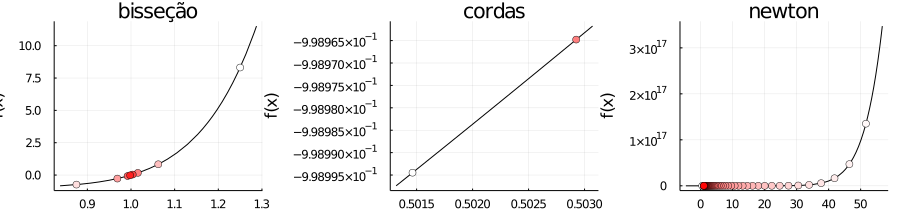

In [41]:
# Gráficos
plot(view(f, x_b, title="bisseção"), view(f, x_c, title="cordas"), view(f, x_n, title="newton"), layout=(1, 3), size=(900, 220))